## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Loan Data](#2.5_Load_The_Loan_Data)
    * [2.4.1 Preprocess and Merge Sample Files](#2.4.1_Preprocess_and_Merge_Sample_Files)
    * [2.4.2 Load Merged Sample Files](#2.4.2_Load_Merged_Sample_Files)
  * [2.5 Explore The Data](#2.5_Explore_The_Data)
    * [2.5.1 Number Of Missing Values By Column](#2.5.1_Number_Of_Missing_Values_By_Column)
    * [2.5.2 Feature Distribution Plots](#2.5.2_Feature_Distribution_Plots)
    * [2.5.3 Address Missing Values](#2.5.3_Address_Missing_Values)    
  * [2.6 Assign Target](#2.6_Assign_Target)
  * [2.7 Distribution of Default Rates by Categorical](#2.7_Distribution_of_Default_Rates_by_Categorical)
  * [2.8 Save Cleaned Data File](#2.8_Save_Cleaned_Data_File)

## 2.2 Introduction<a id='2.2_Introduction'></a>

This project will focus on predicting the default risk of current loans based on historical mortgage loan data. This data wrangling step focuses on collecting the data, updating/removing missing values, retaining relevant features, and assigning prediction target.

## 2.3 Imports<a id='2.3_Imports'></a>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

## 2.4 Load The Loan Data<a id='2.5_Load_The_Loan_Data'></a>

### 2.4.1 Preprocess and Merge Sample Files<a id='2.4.1_Preprocess_and_Merge_Sample_Files'></a>

The code below was used to preprocess, merge the sample files, and generate the raw loan_data.txt file. This code has been commented out prior to pushing the contents to git. Since this would involve uploading large number of sample files (25) to git. The raw loan_data.txt file is compressed since there were size issues when uploading the file to git.

In [67]:
# def create_loan_df(year):
#     orig_df=pd.read_csv('sample_'+str(year)+'/sample_orig_'+str(year)+'.txt',sep='|')
#     orig_columns_updated={i:i.replace(' ','_') for i in orig_df.columns}
#     orig_df=orig_df.rename(columns=orig_columns_updated)
#     perf_df=pd.read_csv('sample_'+str(year)+'/sample_svcg_'+str(year)+'.txt',sep='|')
#     perf_columns_updated={i:i.replace(' ','_') for i in perf_df.columns}
#     perf_df=perf_df.rename(columns=perf_columns_updated)
#     perfmaxdate_df=perf_df.groupby('Loan_Sequence_Number')[['Monthly_Reporting_Period']].max()
#     loan_finalstatus_df=perfmaxdate_df.merge(perf_df,on=['Loan_Sequence_Number','Monthly_Reporting_Period'],how='left')
#     loan_year_df=orig_df.merge(loan_finalstatus_df,on=['Loan_Sequence_Number'],how='left')
#     loan_year_df.to_csv('sample_'+str(year)+'/sample_loan_'+str(year)+'.txt',sep='|')
#     return loan_year_df

In [68]:
# for year in range(1999,2024):
#     if year==1999:
#         loan_df=create_loan_df(year)
#     else:
#         loan_df=pd.concat([loan_df,create_loan_df(year)])
#     print(year,loan_df.shape)

In [69]:
# loan_df.to_csv('../data/raw/loan_data.txt',sep='|',index=False)

In [70]:
# !tar -czvf ../data/raw/loan_data.gz ../data/raw/loan_data.txt

### 2.4.2 Load Merged Sample Files<a id='2.4.2_Load_Merged_Sample_Files'></a>

In [71]:
!tar -xvzf ../data/raw/loan_data.gz

x loan_data.txt


In [72]:
!mv loan_data.txt ../data/raw

In [73]:
df_loan=pd.read_csv('../data/raw/loan_data.txt',sep="|")

C:\Users\rohan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,26,27,28,31,34,38,45,54,55,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2.5 Explore The Data<a id='2.5_Explore_The_Data'></a>

In [74]:
df_loan.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division,Mortgage_Insurance_Percentage_(MI_%),Number_of_Units,Occupancy_Status,Original_Combined_Loan-to-Value_(CLTV),Original_Debt-to-Income_(DTI)_Ratio,Original_UPB,Original_Loan-to-Value_(LTV),Original_Interest_Rate,Channel,Prepayment_Penalty_Mortgage_(PPM)_Flag,Amortization_Type_(Formerly_Product_Type),Property_State,Property_Type,Postal_Code,Loan_Sequence_Number,Loan_Purpose,Original_Loan_Term,Number_of_Borrowers,Seller_Name,Servicer_Name,Super_Conforming_Flag,Pre-HARP_Loan_Sequence_Number,Program_Indicator,HARP_Indicator,Property_Valuation_Method,Interest_Only_(I/O)_Indicator,Mortgage_Insurance_Cancellation_Indicator,Monthly_Reporting_Period,Current_Actual_UPB,Current_Loan_Delinquency_Status,Loan_Age,Remaining_Months_to_Legal_Maturity,Defect_Settlement_Date,Modification_Flag,Zero_Balance_Code,Zero_Balance_Effective_Date,Current_Interest_Rate,Current_Deferred_UPB,Due_Date_of_Last_Paid_Installment_(DDLPI),MI_Recoveries,Net_Sales_Proceeds,Non_MI_Recoveries,Expenses,Legal_Costs,Maintenance_and_Preservation_Costs,Taxes_and_Insurance,Miscellaneous_Expenses,Actual_Loss_Calculation,Modification_Cost,Step_Modification_Flag,Deferred_Payment_Plan,Estimated_Loan-to-Value_(ELTV),Zero_Balance_Removal_UPB,Delinquent_Accrued_Interest,Delinquency_Due_to_Disaster,Borrower_Assistance_Status_Code,Current_Month_Modification_Cost,Interest_Bearing_UPB
0,618,200210,N,202902,10420.00,25,1,P,85,24,122000,85,6.38,R,N,FRM,OH,SF,44200,F99Q10000029,N,317,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9,200405,0.00,0,20,297,nan,NaN,1.00,200405.00,6.38,0.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,118803.96,nan,NaN,NaN,nan,0.00
1,619,200303,N,201802,nan,0,1,P,74,25,107000,74,5.25,R,N,FRM,OH,SF,44600,F99Q10000064,N,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9,201307,0.00,0,125,55,nan,NaN,1.00,201307.00,5.25,0.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,41685.65,nan,NaN,NaN,nan,0.00
2,515,200303,N,202903,12700.00,0,1,S,78,32,232000,78,6.25,R,N,FRM,MA,SF,2600,F99Q10000070,P,313,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9,200504,0.00,0,26,287,nan,NaN,1.00,200504.00,6.25,0.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,64345.87,nan,NaN,NaN,nan,0.00
3,649,199904,Y,202903,17820.00,999,1,P,95,46,157000,95,6.75,T,N,FRM,CO,SF,80900,F99Q10000170,P,360,1,Other sellers,GMAC MORTGAGE CORPORATION,NaN,NaN,9,NaN,9,N,9,200207,0.00,RA,40,320,200207.00,NaN,9.00,200207.00,6.75,0.00,200108.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,NaN,NaN,nan,151980.32,0.00,NaN,NaN,nan,0.00
4,768,199905,N,202904,12980.00,0,1,P,75,21,111000,75,6.75,R,N,FRM,MI,SF,49200,F99Q10000228,C,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9,200112,0.00,0,32,328,nan,NaN,1.00,200112.00,6.75,0.00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,107139.16,nan,NaN,NaN,nan,0.00


In [75]:
df_loan.shape

(1225000, 63)

In [76]:
df_loan['Loan_Sequence_Number'].nunique()

1225000

In [77]:
df_loan.describe()

,Credit_Score,First_Payment_Date,Maturity_Date,Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division,Mortgage_Insurance_Percentage_(MI_%),Number_of_Units,Original_Combined_Loan-to-Value_(CLTV),Original_Debt-to-Income_(DTI)_Ratio,Original_UPB,Original_Loan-to-Value_(LTV),Original_Interest_Rate,Postal_Code,Original_Loan_Term,Number_of_Borrowers,Property_Valuation_Method,Monthly_Reporting_Period,Current_Actual_UPB,Loan_Age,Remaining_Months_to_Legal_Maturity,Defect_Settlement_Date,Zero_Balance_Code,Zero_Balance_Effective_Date,Current_Interest_Rate,Current_Deferred_UPB,Due_Date_of_Last_Paid_Installment_(DDLPI),MI_Recoveries,Non_MI_Recoveries,Expenses,Legal_Costs,Maintenance_and_Preservation_Costs,Taxes_and_Insurance,Miscellaneous_Expenses,Actual_Loss_Calculation,Modification_Cost,Estimated_Loan-to-Value_(ELTV),Zero_Balance_Removal_UPB,Delinquent_Accrued_Interest,Current_Month_Modification_Cost,Interest_Bearing_UPB
count,1225000.00,1225000.00,1225000.00,954009.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,1225000.00,4533.00,937624.00,937623.00,1225000.00,1225000.00,288328.00,20372.00,20372.00,20372.00,20372.00,20372.00,20372.00,20372.00,20453.00,23944.00,610270.00,937624.00,25684.00,27516.00,1225000.00
mean,757.28,201098.50,203707.97,30314.63,4.89,1.04,72.83,109.48,204143.15,71.68,5.14,53225.16,314.09,1.57,7.10,201523.97,49060.28,51.06,263.63,201178.33,1.54,201283.41,5.13,94.70,201929.30,9730.12,2092.41,-14918.65,-3308.30,-4623.35,-6120.07,-866.93,-67197.02,13768.34,532.90,167157.37,12481.23,156.47,48965.58
std,394.40,707.18,1009.46,11300.11,11.30,0.85,20.36,259.51,122612.59,19.71,1.42,29486.65,77.15,1.46,3.16,719.65,113668.62,42.53,94.09,572.53,5.75,655.64,1.43,1763.84,405.04,21878.99,8504.97,17032.66,3012.18,7614.84,11088.52,2540.80,62852.19,24583.27,476.81,112610.71,17654.90,253.40,113489.51
min,300.00,199901.00,200210.00,10180.00,0.00,1.00,2.00,1.00,7000.00,2.00,1.75,0.00,36.00,1.00,1.00,199903.00,0.00,0.00,-49.00,199905.00,1.00,199903.00,1.75,0.00,199903.00,0.00,-30976.00,-329700.99,-84960.16,-142153.83,-267682.29,-142558.89,-784196.19,-22553.57,1.00,0.00,-2148.25,-343.41,0.00
25%,707.00,200504.00,203012.00,19300.00,0.00,1.00,62.00,27.00,113000.00,61.00,4.00,29600.00,240.00,1.00,2.00,201005.00,0.00,19.00,193.00,200906.00,1.00,200807.00,4.00,0.00,201912.00,0.00,72.52,-19868.40,-4602.73,-5522.10,-7509.53,-1036.95,-97203.11,340.60,45.00,86071.49,1064.16,8.07,0.00
50%,751.00,201106.00,203710.00,31700.00,0.00,1.00,77.00,36.00,175000.00,75.00,4.99,52000.00,360.00,2.00,9.00,201703.00,0.00,37.00,304.00,201110.00,1.00,201304.00,4.88,0.00,202010.00,0.00,880.89,-10700.06,-2954.87,-1588.09,-3322.88,-365.00,-54729.09,1680.55,999.00,144545.99,7437.77,47.72,0.00
75%,783.00,201707.00,204601.00,40060.00,0.00,1.00,84.00,44.00,268000.00,80.00,6.25,80400.00,360.00,2.00,9.00,202210.00,0.00,73.00,336.00,201408.00,1.00,201909.00,6.12,0.00,202107.00,0.00,2048.91,-4724.78,-1364.65,-80.00,-1039.52,-173.88,-20435.30,16843.17,999.00,228150.54,16129.23,212.43,0.00
max,9999.00,202310.00,205309.00,49740.00,999.00,99.00,999.00,999.00,1582000.00,999.00,13.75,99900.00,480.00,99.00,9.00,202309.00,1506764.78,295.00,480.00,202310.00,96.00,202310.00,13.75,217706.14,205202.00,180062.32,385557.40,503296.76,6981.87,288.07,510225.28,38711.55,118785.45,248410.30,999.00,1143156.27,419139.09,10654.56,1506764.78


In [78]:
df_loan.columns

Index(['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag',
       'Maturity_Date',
       'Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division',
       'Mortgage_Insurance_Percentage_(MI_%)', 'Number_of_Units',
       'Occupancy_Status', 'Original_Combined_Loan-to-Value_(CLTV)',
       'Original_Debt-to-Income_(DTI)_Ratio', 'Original_UPB',
       'Original_Loan-to-Value_(LTV)', 'Original_Interest_Rate', 'Channel',
       'Prepayment_Penalty_Mortgage_(PPM)_Flag',
       'Amortization_Type_(Formerly_Product_Type)', 'Property_State',
       'Property_Type', 'Postal_Code', 'Loan_Sequence_Number', 'Loan_Purpose',
       'Original_Loan_Term', 'Number_of_Borrowers', 'Seller_Name',
       'Servicer_Name', 'Super_Conforming_Flag',
       'Pre-HARP_Loan_Sequence_Number', 'Program_Indicator', 'HARP_Indicator',
       'Property_Valuation_Method', 'Interest_Only_(I/O)_Indicator',
       'Mortgage_Insurance_Cancellation_Indicator', 'Monthly_Reporting_Period',
       'Current_

In [79]:
df_loan.dtypes
dtype_dict=df_loan.dtypes.to_dict()
dtype_dict

{'Credit_Score': dtype('int64'),
 'First_Payment_Date': dtype('int64'),
 'First_Time_Homebuyer_Flag': dtype('O'),
 'Maturity_Date': dtype('int64'),
 'Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division': dtype('float64'),
 'Mortgage_Insurance_Percentage_(MI_%)': dtype('int64'),
 'Number_of_Units': dtype('int64'),
 'Occupancy_Status': dtype('O'),
 'Original_Combined_Loan-to-Value_(CLTV)': dtype('int64'),
 'Original_Debt-to-Income_(DTI)_Ratio': dtype('int64'),
 'Original_UPB': dtype('int64'),
 'Original_Loan-to-Value_(LTV)': dtype('int64'),
 'Original_Interest_Rate': dtype('float64'),
 'Channel': dtype('O'),
 'Prepayment_Penalty_Mortgage_(PPM)_Flag': dtype('O'),
 'Amortization_Type_(Formerly_Product_Type)': dtype('O'),
 'Property_State': dtype('O'),
 'Property_Type': dtype('O'),
 'Postal_Code': dtype('int64'),
 'Loan_Sequence_Number': dtype('O'),
 'Loan_Purpose': dtype('O'),
 'Original_Loan_Term': dtype('int64'),
 'Number_of_Borrowers': dtype('int64'),
 'Seller_Name': dtype('O')

### 2.5.1 Number Of Missing Values By Column<a id='2.5.1_Number_Of_Missing_Values_By_Column'></a>

In [80]:
null_col_dict={'Credit_Score':{'null_val':[9999,None]},'First_Time_Homebuyer_Flag':{'null_val':['9',None]},'Mortgage_Insurance_Percentage_(MI_%)':{'null_val':[999,None]},'Number_of_Units':{'null_val':[99,None]},'Occupancy_Status':{'null_val':['9',None]},'Original_Combined_Loan-to-Value_(CLTV)':{'null_val':[999,None]},'Original_Debt-to-Income_(DTI)_Ratio':{'null_val':[999,None]},'Original_Loan-to-Value_(LTV)':{'null_val':[999,None]},'Channel':{'null_val':['9',None]},'Property_Type':{'null_val':['99',None]},'Loan_Purpose':{'null_val':['9',None]},'Number_of_Borrowers':{'null_val':[99,None]},'Program_Indicator':{'null_val':['9',None]},'Property_Valuation_Method':{'null_val':[9,None]},'Estimated_Loan-to-Value_(ELTV)':{'null_val':[999,None]},'Mortgage_Insurance_Cancellation_Indicator':{'null_val':['9',None]},'Modification_Flag':{'null_val':[None]},'Step_Modification_Flag':{'null_val':[None]},'Deferred_Payment_Plan':{'null_val':[None]},'Delinquency_Due_to_Disaster':{'null_val':[None]},'Borrower_Assistance_Status_Code':{'null_val':[None]}}

In [81]:
# null_col_dict={'Estimated_Loan-to-Value_(ELTV)':{'null_val':[999,None]}}

In [82]:
# df_loan['Estimated_Loan-to-Value_(ELTV)'].value_counts()

In [83]:
print(null_col_dict.items())

dict_items([('Credit_Score', {'null_val': [9999, None]}), ('First_Time_Homebuyer_Flag', {'null_val': ['9', None]}), ('Mortgage_Insurance_Percentage_(MI_%)', {'null_val': [999, None]}), ('Number_of_Units', {'null_val': [99, None]}), ('Occupancy_Status', {'null_val': ['9', None]}), ('Original_Combined_Loan-to-Value_(CLTV)', {'null_val': [999, None]}), ('Original_Debt-to-Income_(DTI)_Ratio', {'null_val': [999, None]}), ('Original_Loan-to-Value_(LTV)', {'null_val': [999, None]}), ('Channel', {'null_val': ['9', None]}), ('Property_Type', {'null_val': ['99', None]}), ('Loan_Purpose', {'null_val': ['9', None]}), ('Number_of_Borrowers', {'null_val': [99, None]}), ('Program_Indicator', {'null_val': ['9', None]}), ('Property_Valuation_Method', {'null_val': [9, None]}), ('Estimated_Loan-to-Value_(ELTV)', {'null_val': [999, None]}), ('Mortgage_Insurance_Cancellation_Indicator', {'null_val': ['9', None]}), ('Modification_Flag', {'null_val': [None]}), ('Step_Modification_Flag', {'null_val': [None]})

In [84]:
for k,v in null_col_dict.items():
    try:
        if null_col_dict[k]['null_val'][0] in df_loan[k].value_counts():
            df_loan[k]=df_loan[k].replace(null_col_dict[k]['null_val'][0],np.nan)
        null_col_cnt=df_loan[k].isnull().sum()
        print(null_col_cnt)
        null_col_dict[k]['null_row_cnt']=null_col_cnt
    except Exception as e:            
        print(k,e)

2188
730
28
87
0
50
95936
44
61
46
1
243
397173
900141
926616
13568
1208537
1224938
1212786
1224067
1224137


All these columns have more than 90% missing values, so we will drop them. Defect Settlement Date, Current Month Modification Cost, Due Date of Last Paid Installment, MI Recoveries, Non MI Recoveries, Expenses, Legal Costs, Maintenance and Preservation Costs, Taxes and Insurance, Miscellaneous Expenses, Actual Loss Calculation, Modification Cost, Zero Balance Removal UPB, Delinquent Accrued Interest, Current Month Modification Cost, Defect Settlement Date, Super Conforming Flag, Pre-HARP Loan Sequence Number, HARP Indicator, Property Valuation Method, Estimated Loan to Value, Modification Flag, Step Modification Flag, Deferred Payment Plan, Delinquency due to disaster, and borrower assistance status code.

In [85]:
null_col_dict

{'Credit_Score': {'null_val': [9999, None], 'null_row_cnt': 2188},
 'First_Time_Homebuyer_Flag': {'null_val': ['9', None], 'null_row_cnt': 730},
 'Mortgage_Insurance_Percentage_(MI_%)': {'null_val': [999, None],
  'null_row_cnt': 28},
 'Number_of_Units': {'null_val': [99, None], 'null_row_cnt': 87},
 'Occupancy_Status': {'null_val': ['9', None], 'null_row_cnt': 0},
 'Original_Combined_Loan-to-Value_(CLTV)': {'null_val': [999, None],
  'null_row_cnt': 50},
 'Original_Debt-to-Income_(DTI)_Ratio': {'null_val': [999, None],
  'null_row_cnt': 95936},
 'Original_Loan-to-Value_(LTV)': {'null_val': [999, None], 'null_row_cnt': 44},
 'Channel': {'null_val': ['9', None], 'null_row_cnt': 61},
 'Property_Type': {'null_val': ['99', None], 'null_row_cnt': 46},
 'Loan_Purpose': {'null_val': ['9', None], 'null_row_cnt': 1},
 'Number_of_Borrowers': {'null_val': [99, None], 'null_row_cnt': 243},
 'Program_Indicator': {'null_val': ['9', None], 'null_row_cnt': 397173},
 'Property_Valuation_Method': {'null

In [86]:
df_loan=df_loan.drop(columns=['Current_Month_Modification_Cost','Defect_Settlement_Date','Pre-HARP_Loan_Sequence_Number','Super_Conforming_Flag','Delinquent_Accrued_Interest','Modification_Cost','Actual_Loss_Calculation','Miscellaneous_Expenses','Taxes_and_Insurance','Maintenance_and_Preservation_Costs','Legal_Costs','Expenses','Non_MI_Recoveries','Net_Sales_Proceeds','MI_Recoveries','Due_Date_of_Last_Paid_Installment_(DDLPI)','Borrower_Assistance_Status_Code','Delinquency_Due_to_Disaster','Deferred_Payment_Plan','Step_Modification_Flag','Modification_Flag','Estimated_Loan-to-Value_(ELTV)','Property_Valuation_Method','Amortization_Type_(Formerly_Product_Type)','Mortgage_Insurance_Cancellation_Indicator','Program_Indicator'])

In [87]:
df_loan.shape

(1225000, 37)

In [88]:
df_loan.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division,Mortgage_Insurance_Percentage_(MI_%),Number_of_Units,Occupancy_Status,Original_Combined_Loan-to-Value_(CLTV),Original_Debt-to-Income_(DTI)_Ratio,Original_UPB,Original_Loan-to-Value_(LTV),Original_Interest_Rate,Channel,Prepayment_Penalty_Mortgage_(PPM)_Flag,Property_State,Property_Type,Postal_Code,Loan_Sequence_Number,Loan_Purpose,Original_Loan_Term,Number_of_Borrowers,Seller_Name,Servicer_Name,HARP_Indicator,Interest_Only_(I/O)_Indicator,Monthly_Reporting_Period,Current_Actual_UPB,Current_Loan_Delinquency_Status,Loan_Age,Remaining_Months_to_Legal_Maturity,Zero_Balance_Code,Zero_Balance_Effective_Date,Current_Interest_Rate,Current_Deferred_UPB,Zero_Balance_Removal_UPB,Interest_Bearing_UPB
0,618.00,200210,N,202902,10420.00,25.00,1.00,P,85.00,24.00,122000,85.00,6.38,R,N,OH,SF,44200,F99Q10000029,N,317,2.00,Other sellers,Other servicers,NaN,N,200405,0.00,0,20,297,1.00,200405.00,6.38,0.00,118803.96,0.00
1,619.00,200303,N,201802,nan,0.00,1.00,P,74.00,25.00,107000,74.00,5.25,R,N,OH,SF,44600,F99Q10000064,N,180,2.00,Other sellers,Other servicers,NaN,N,201307,0.00,0,125,55,1.00,201307.00,5.25,0.00,41685.65,0.00
2,515.00,200303,N,202903,12700.00,0.00,1.00,S,78.00,32.00,232000,78.00,6.25,R,N,MA,SF,2600,F99Q10000070,P,313,2.00,Other sellers,Other servicers,NaN,N,200504,0.00,0,26,287,1.00,200504.00,6.25,0.00,64345.87,0.00
3,649.00,199904,Y,202903,17820.00,nan,1.00,P,95.00,46.00,157000,95.00,6.75,T,N,CO,SF,80900,F99Q10000170,P,360,1.00,Other sellers,GMAC MORTGAGE CORPORATION,NaN,N,200207,0.00,RA,40,320,9.00,200207.00,6.75,0.00,151980.32,0.00
4,768.00,199905,N,202904,12980.00,0.00,1.00,P,75.00,21.00,111000,75.00,6.75,R,N,MI,SF,49200,F99Q10000228,C,360,2.00,Other sellers,Other servicers,NaN,N,200112,0.00,0,32,328,1.00,200112.00,6.75,0.00,107139.16,0.00


In [89]:
df_loan_numeric=df_loan._get_numeric_data().drop(columns=['Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division','First_Payment_Date','Maturity_Date','Postal_Code','Monthly_Reporting_Period','Zero_Balance_Code','Zero_Balance_Effective_Date','Zero_Balance_Removal_UPB'])

In [90]:
df_loan_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit_Score,1222812.00,740.75,52.27,300.00,706.00,751.00,783.00,850.00
Mortgage_Insurance_Percentage_(MI_%),1224972.00,4.87,10.26,0.00,0.00,0.00,0.00,55.00
Number_of_Units,1224913.00,1.03,0.22,1.00,1.00,1.00,1.00,4.00
Original_Combined_Loan-to-Value_(CLTV),1224950.00,72.79,19.48,2.00,62.00,77.00,84.00,630.00
Original_Debt-to-Income_(DTI)_Ratio,1129064.00,33.90,10.97,1.00,26.00,34.00,42.00,65.00
Original_UPB,1225000.00,204143.15,122612.59,7000.00,113000.00,175000.00,268000.00,1582000.00
Original_Loan-to-Value_(LTV),1224956.00,71.65,18.91,2.00,61.00,75.00,80.00,534.00
Original_Interest_Rate,1225000.00,5.14,1.42,1.75,4.00,4.99,6.25,13.75
Original_Loan_Term,1225000.00,314.09,77.15,36.00,240.00,360.00,360.00,480.00
Number_of_Borrowers,1224757.00,1.56,0.50,1.00,1.00,2.00,2.00,5.00


### 2.5.2 Feature Distribution Plots<a id='2.5.2_Feature_Distribution_Plots'></a>

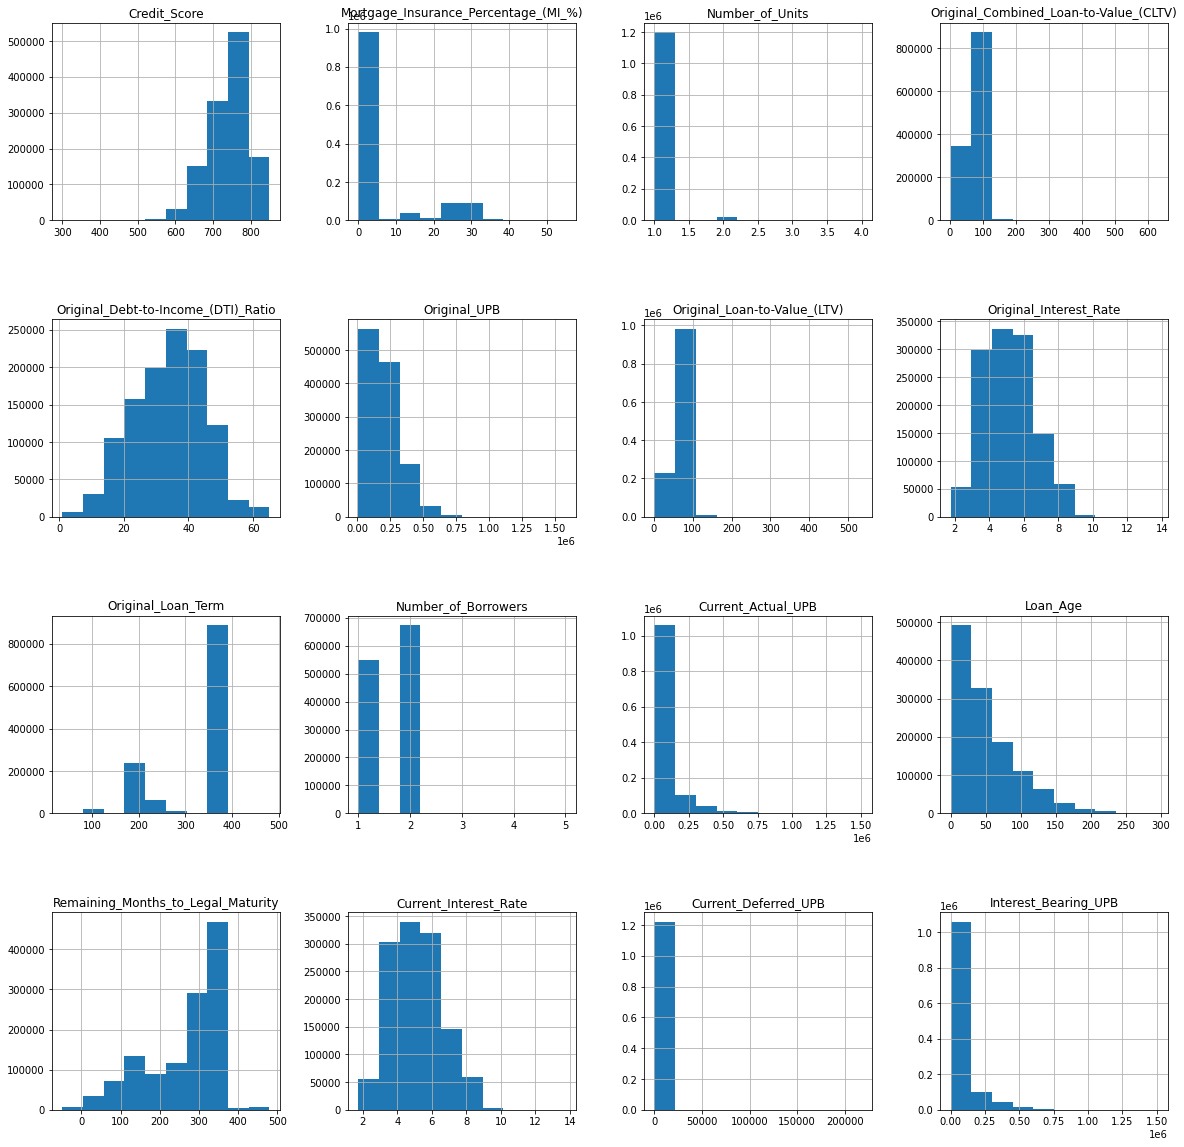

In [91]:
df_loan._get_numeric_data().drop(columns=['Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division','First_Payment_Date','Maturity_Date','Postal_Code','Monthly_Reporting_Period','Zero_Balance_Code','Zero_Balance_Effective_Date','Zero_Balance_Removal_UPB']).hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

### 2.5.3 Address Missing Values<a id='2.5.3_Address_Missing_Values'></a>

Columns with missing values were replaced with the median or mean or overwhelmingly majority value. The distribution for credit score is left skewed so the mean would be affected by the low credit scores. Hence, the missing values were replaced with the median which was 751. For Mortgage Insurance the missing values were replaced with the mean, 4.87. First Time Homebuyer Flag had 730 missing values which were replaced with 'N', because majority of the values are 'N'. The number of units column had 87 missing values. This which were replaced with the median value, 1. The Combined loan-to-value had 50 missing values which were replaced with the median which was 77. The Debt-to-Income column had 95,000 missing values which were replaced with the rate for HARP loans which is 45% according to Central Coast lending and the rest were replaced with 70% (as per freddie mac user guide the values missing in the data are either rates for HARP loans or exceed 65% for non HARP loans). The Loan-to-Value had 44 missing values which were replaced with the median which was 75. The channel column had 61 missing values which were replaced with 'TPO'. The Property Type variable had 46 missing values which were replaced with the 'Single Family' category because it was in the overwhelming majority. The Loan Purpose column had 1 missing observation which was replaced with the 'P'. The Number of Borrowers had 243 missing values which were replaced with the median which was 2. The Metropolitan/MSA column had missing values indicating it is either unkown or not MSA/Metropolitan. Replaced this with 0.

In [92]:
df_loan['First_Time_Homebuyer_Flag']=df_loan['First_Time_Homebuyer_Flag'].fillna(df_loan['First_Time_Homebuyer_Flag'].mode()[0])

In [93]:
df_loan['Number_of_Units']=df_loan['Number_of_Units'].fillna(df_loan['Number_of_Units'].median())

In [94]:
df_loan['Original_Combined_Loan-to-Value_(CLTV)']=df_loan['Original_Combined_Loan-to-Value_(CLTV)'].fillna(df_loan['Original_Combined_Loan-to-Value_(CLTV)'].median())

In [95]:
df_loan['Original_Loan-to-Value_(LTV)']=df_loan['Original_Loan-to-Value_(LTV)'].fillna(df_loan['Original_Loan-to-Value_(LTV)'].median())

In [96]:
df_loan['Channel']=df_loan['Channel'].fillna('T')

In [97]:
df_loan['Property_Type']=df_loan['Property_Type'].fillna(df_loan['Property_Type'].mode()[0])

In [98]:
df_loan['Loan_Purpose']=df_loan['Loan_Purpose'].fillna(df_loan['Loan_Purpose'].mode()[0])

In [99]:
df_loan['Number_of_Borrowers']=df_loan['Number_of_Borrowers'].fillna(df_loan['Number_of_Borrowers'].mode()[0])

In [100]:
df_loan['Mortgage_Insurance_Percentage_(MI_%)']=df_loan['Mortgage_Insurance_Percentage_(MI_%)'].fillna(df_loan['Mortgage_Insurance_Percentage_(MI_%)'].mean())

In [101]:
df_loan.loc[df_loan['HARP_Indicator']=='Y','Original_Debt-to-Income_(DTI)_Ratio'] = df_loan.loc[df_loan['HARP_Indicator']=='Y','Original_Debt-to-Income_(DTI)_Ratio'].fillna(45)    

In [102]:
df_loan['Original_Debt-to-Income_(DTI)_Ratio']=df_loan['Original_Debt-to-Income_(DTI)_Ratio'].fillna(70)

In [103]:
df_loan['Credit_Score']=df_loan['Credit_Score'].fillna(df_loan['Credit_Score'].median())

In [104]:
df_loan['Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division']=df_loan['Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division'].fillna(0)

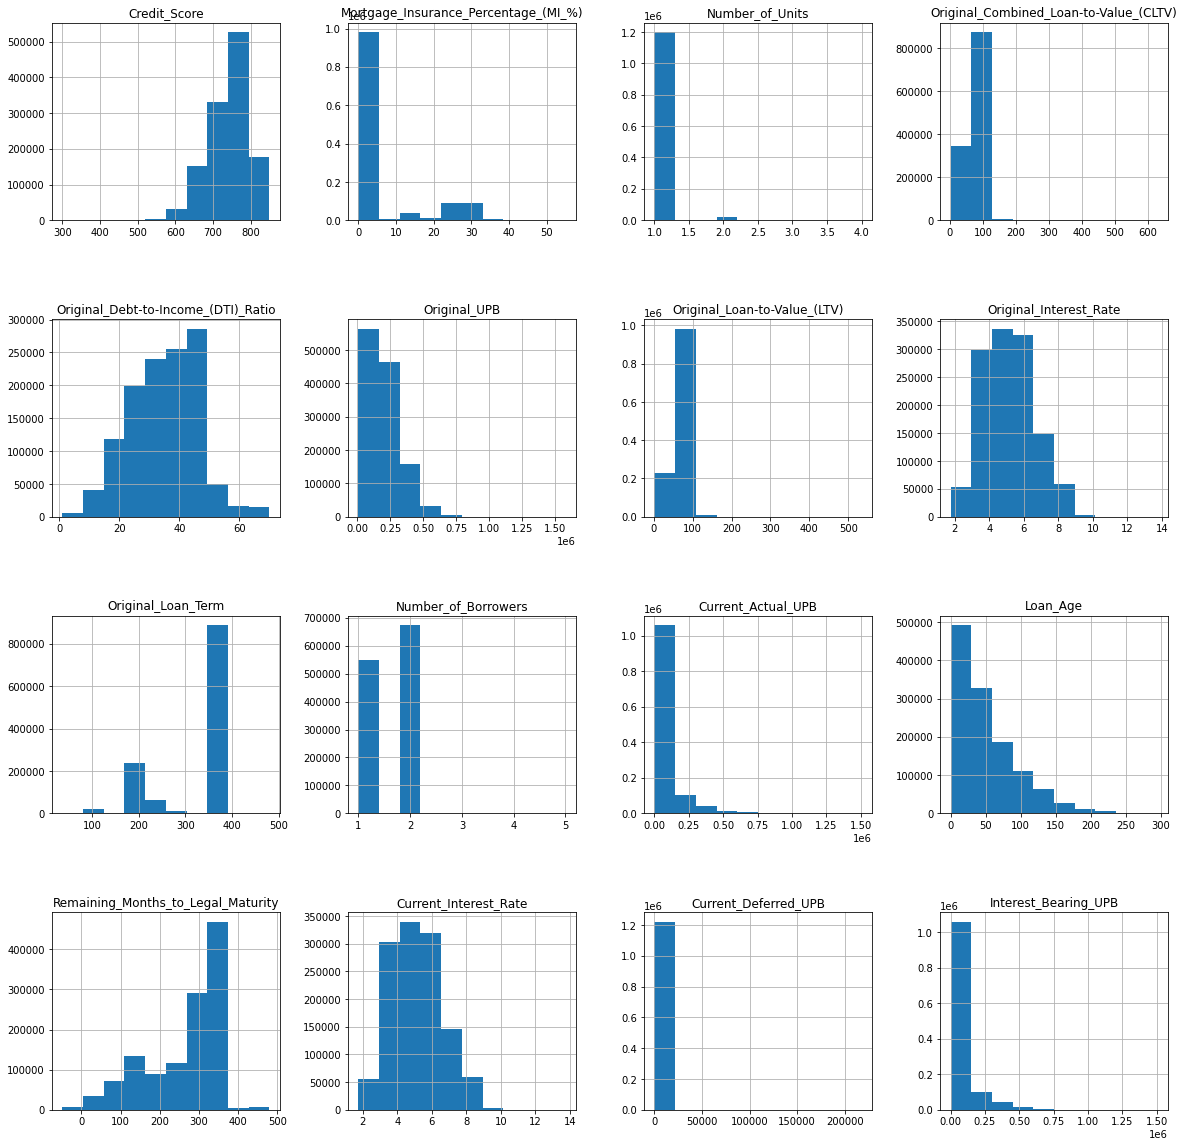

In [105]:
df_loan._get_numeric_data().drop(columns=['Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division','First_Payment_Date','Maturity_Date','Postal_Code','Monthly_Reporting_Period','Zero_Balance_Code','Zero_Balance_Effective_Date','Zero_Balance_Removal_UPB']).hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

In [106]:
df_loan.isna().sum()

Credit_Score                                                          0
First_Payment_Date                                                    0
First_Time_Homebuyer_Flag                                             0
Maturity_Date                                                         0
Metropolitan_Statistical_Area_(MSA)_Or_Metropolitan_Division          0
Mortgage_Insurance_Percentage_(MI_%)                                  0
Number_of_Units                                                       0
Occupancy_Status                                                      0
Original_Combined_Loan-to-Value_(CLTV)                                0
Original_Debt-to-Income_(DTI)_Ratio                                   0
Original_UPB                                                          0
Original_Loan-to-Value_(LTV)                                          0
Original_Interest_Rate                                                0
Channel                                                         

In [107]:
df_loan['Zero_Balance_Code'].value_counts()

1.00     908598
9.00      11587
16.00      5324
3.00       4546
96.00      3222
2.00       3220
15.00      1127
Name: Zero_Balance_Code, dtype: int64

## 2.6 Assign Target<a id='2.6_Assign_Target'></a>

Per Freddie Mac user guide, zero balance code equal to 9 or 3 indicates REO disposition (foreclosure) or short sale, which is essentially default. If zero balance code is neither 9 or 3, then the current loan delinquency status is considered. The current loan delinquency status equal to 'RA' (REO acquistion) indicates default.

In [108]:
condlist=[df_loan['Zero_Balance_Code'].isin([9,3]),df_loan['Current_Loan_Delinquency_Status']=='RA']
choicelist=[1,1]
df_loan['default_status']=np.select(condlist,choicelist,0)

The below default counts indicates is about 1.3% (16429/(16249+1208751)). This indicates that this is an imbalanced dataset and we need to keep this in mind during modeling.

In [109]:
df_loan['default_status'].value_counts()

0    1208751
1      16249
Name: default_status, dtype: int64

## 2.7 Distribution of Default rates by Categorical<a id='2.7_Distribution_of_Default_Rates_by_Categorical'></a>

In [110]:
def no_defaults(x):
    return (x==0).sum()

In [111]:
state_default_df=df_loan.groupby('Property_State')['default_status'].agg(['sum',no_defaults,'count']).rename(columns={'sum':'defaults'})
state_default_df['default_rate']=((state_default_df['defaults']*1.0)/state_default_df['count'])
state_default_df['no_default_rate']=((state_default_df['no_defaults']*1.0)/state_default_df['count'])
state_default_df.head()
state_default_rate_df=state_default_df[['default_rate']]

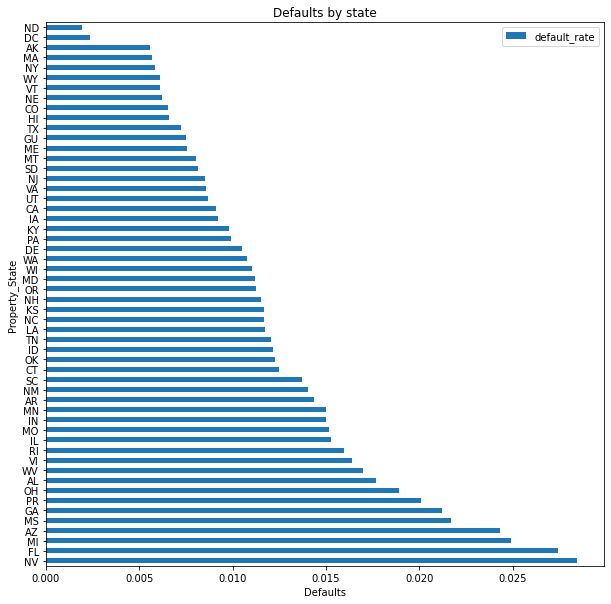

In [112]:
(state_default_rate_df.reindex(index=state_default_rate_df['default_rate']
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Defaults by state'))
plt.xlabel('Defaults');

In [113]:
property_type_default_df=df_loan.groupby('Property_Type')['default_status'].agg(['sum',no_defaults,'count']).rename(columns={'sum':'defaults'})
property_type_default_df['default_rate']=((property_type_default_df['defaults']*1.0)/property_type_default_df['count'])
property_type_default_df['no_default_rate']=((property_type_default_df['no_defaults']*1.0)/property_type_default_df['count'])
property_type_default_df.head()
property_type_default_rate_df=property_type_default_df[['default_rate']]

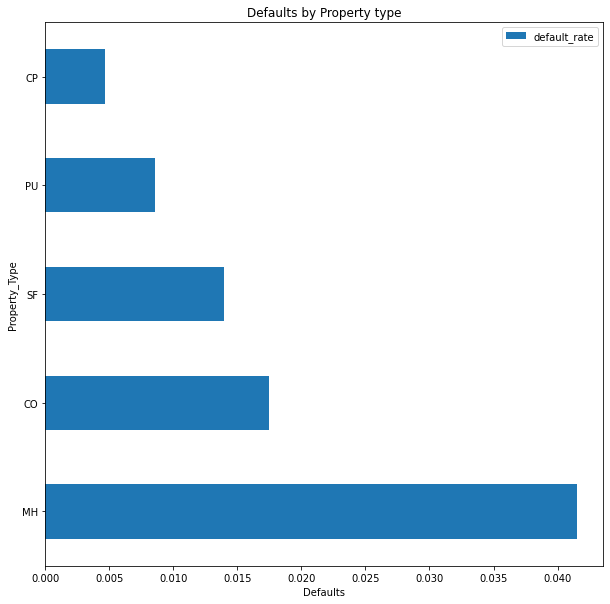

In [114]:
(property_type_default_rate_df.reindex(index=property_type_default_rate_df['default_rate']
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Defaults by Property type'))
plt.xlabel('Defaults');

In [115]:
servicer_name_default_df=df_loan.groupby('Servicer_Name')['default_status'].agg(['sum',no_defaults,'count']).rename(columns={'sum':'defaults'})
servicer_name_default_df['default_rate']=((servicer_name_default_df['defaults']*1.0)/servicer_name_default_df['count'])
servicer_name_default_df['no_default_rate']=((servicer_name_default_df['no_defaults']*1.0)/servicer_name_default_df['count'])
servicer_name_default_df['default_rate']=servicer_name_default_df[servicer_name_default_df['default_rate']!=0]
servicer_name_default_df=servicer_name_default_df.dropna()
servicer_name_default_rate_df=servicer_name_default_df[['default_rate']]
servicer_name_default_rate_df.head()

,default_rate
Servicer_Name,
"ABN AMRO MORTGAGE GROUP, INC.",275.00
"AMERIHOME MORTGAGE COMPANY, LLC",3.00
AMTRUST BANK,1.00
ARVEST CENTRAL MORTGAGE COMPANY,2.00
"BANK OF AMERICA, N.A.",1970.00


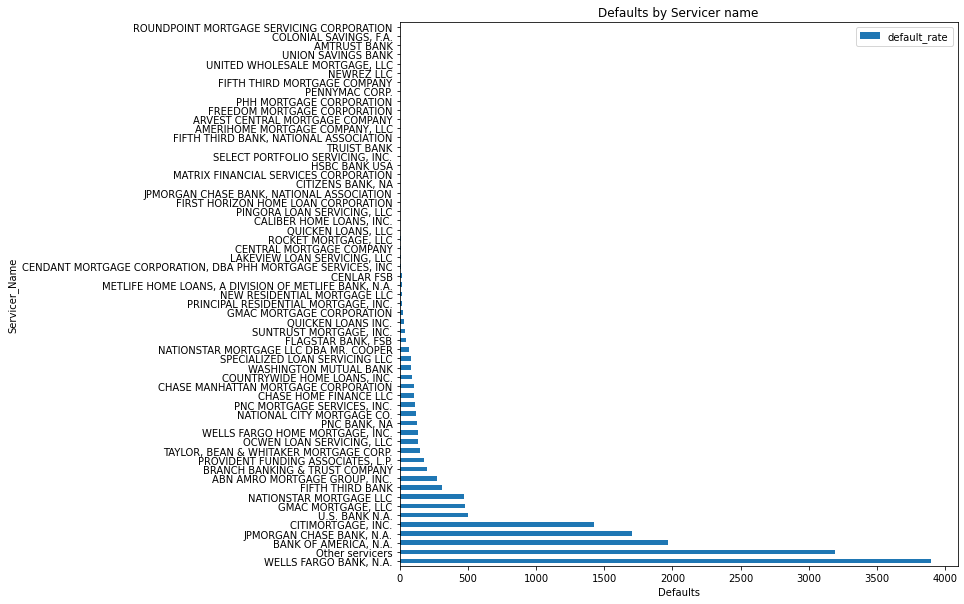

In [116]:
(servicer_name_default_rate_df.reindex(index=servicer_name_default_rate_df['default_rate']
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Defaults by Servicer name'))
plt.xlabel('Defaults');

In [117]:
num_borrowers_default_df=df_loan.groupby('Number_of_Borrowers')['default_status'].agg(['sum',no_defaults,'count']).rename(columns={'sum':'defaults'})
num_borrowers_default_df['default_rate']=((num_borrowers_default_df['defaults']*1.0)/num_borrowers_default_df['count'])
num_borrowers_default_df['no_default_rate']=((num_borrowers_default_df['no_defaults']*1.0)/num_borrowers_default_df['count'])
num_borrowers_default_df.head()
num_borrowers_default_rate_df=num_borrowers_default_df[['default_rate']]

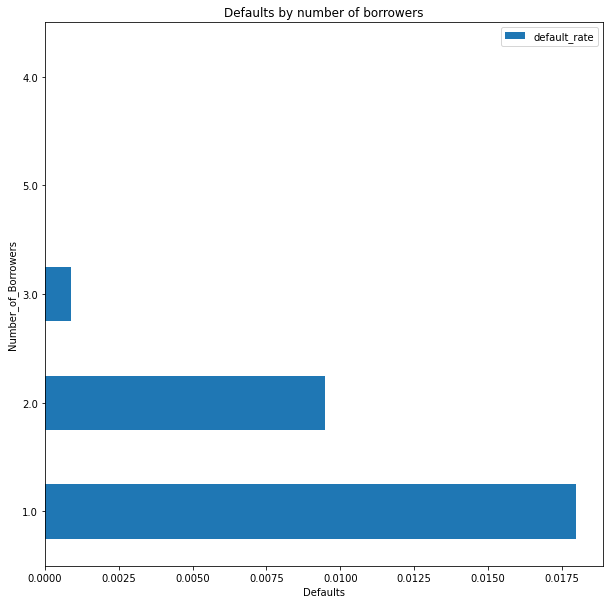

In [118]:
(num_borrowers_default_rate_df.reindex(index=num_borrowers_default_rate_df['default_rate']
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Defaults by number of borrowers'))
plt.xlabel('Defaults');

## 2.8 Save Cleaned Data File<a id='2.8_Save_Cleaned_Data_File'></a>

In [119]:
df_loan.to_csv('../data/processed/df_loan_cleaned.txt',sep="|")